In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
data = pd.read_csv("../adult_randoms/metrics.csv")
data

,algo,no,precision,dm,cm,entropy,discern,ilm,hellinger,bivariate_corr,auroc,lr_acc,avg_eq_size,ambiguity,granularity,dse
0,datafly,1,0.184196,0.067073,0.248922,0.882860,0.279394,0.058538,0.443068,0.256469,0.773481,0.743080,0.062500,0.069667,0.057023,0.238947
1,datafly_shuffled,1,0.217921,0.085366,0.240634,0.813822,0.127674,0.056074,0.395327,0.327287,0.719695,0.742582,0.015152,0.010974,0.051121,0.240472
2,mondrian,1,0.551444,0.817073,0.161296,0.429300,0.000632,0.050426,0.451907,0.014277,0.829046,0.780872,0.000207,0.000146,0.030998,0.238966
3,datafly,2,0.167015,0.079268,0.248922,0.925670,0.436592,0.066250,0.463347,0.006995,0.552691,0.742582,0.100000,0.209875,0.060806,0.241456
4,datafly_shuffled,2,0.210820,0.067073,0.248922,0.860101,0.231081,0.058820,0.443068,0.000108,0.705604,0.719543,0.055556,0.042687,0.056111,0.240277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,datafly_shuffled,199,0.240942,0.140244,0.243353,0.777514,0.073246,0.056830,0.443068,0.004344,0.715271,0.743080,0.013889,0.010503,0.051016,0.251571
596,mondrian,199,0.553054,0.884146,0.158544,0.493906,0.001710,0.050705,0.438494,0.016014,0.847372,0.806067,0.000253,0.000164,0.029824,0.191091
597,datafly,200,0.242756,0.079268,0.206750,0.910911,0.385237,0.055366,0.395327,0.249884,0.698575,0.781866,0.040000,0.014306,0.054418,0.229979
598,datafly_shuffled,200,0.168498,0.073171,0.248922,0.897395,0.292923,0.063834,0.438883,0.326455,0.733716,0.742582,0.058824,0.124879,0.058773,0.242644


In [16]:
monds = data[data["algo"]=="mondrian"]
monds

,algo,no,precision,dm,cm,entropy,discern,ilm,hellinger,bivariate_corr,auroc,lr_acc,avg_eq_size,ambiguity,granularity,dse
2,mondrian,1,0.551444,0.817073,0.161296,0.429300,0.000632,0.050426,0.451907,0.014277,0.829046,0.780872,0.000207,0.000146,0.030998,0.238966
5,mondrian,2,0.601632,0.890244,0.168789,0.455484,0.000800,0.050114,0.418494,0.011515,0.794420,0.756174,0.000227,0.000131,0.026451,0.239253
8,mondrian,3,0.666005,0.902439,0.146907,0.446026,0.000662,0.040253,0.373161,0.016304,0.787504,0.720869,0.000191,0.000126,0.022192,0.297511
11,mondrian,4,0.579841,0.817073,0.149990,0.451049,0.000947,0.046475,0.438728,0.017531,0.836350,0.776562,0.000225,0.000149,0.029587,0.224843
14,mondrian,5,0.575736,0.853659,0.160533,0.460302,0.000885,0.055708,0.461726,0.019331,0.871369,0.810874,0.000229,0.000141,0.028388,0.226512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,mondrian,196,0.632676,0.939024,0.153040,0.471781,0.001085,0.042605,0.452813,0.014365,0.863790,0.788828,0.000233,0.000137,0.024982,0.170456
590,mondrian,197,0.501787,0.847561,0.167462,0.464537,0.000954,0.051020,0.449480,0.012823,0.858586,0.806232,0.000299,0.000229,0.034210,0.224855
593,mondrian,198,0.575487,0.878049,0.161229,0.472341,0.001851,0.051645,0.463825,0.016477,0.861373,0.803083,0.000182,0.000111,0.029475,0.225070
596,mondrian,199,0.553054,0.884146,0.158544,0.493906,0.001710,0.050705,0.438494,0.016014,0.847372,0.806067,0.000253,0.000164,0.029824,0.191091


In [17]:
import xml.etree.ElementTree as et
def get_k(conf):
    return int(conf.attrib["k"])

def get_config(i):
    f = f"../../toolbox_linux64/configs/adult_randoms/mondrian{i}.xml"
    xml = et.parse(f)
    root = xml.getroot()
    return root

ks = [get_k(get_config(i)) for i in range(1,201)]
monds["k"] = ks

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11dd10990>]],
      dtype=object)

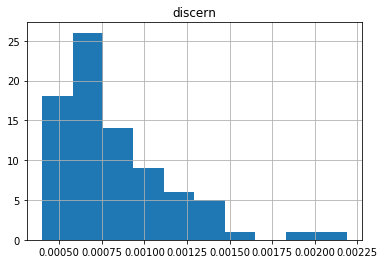

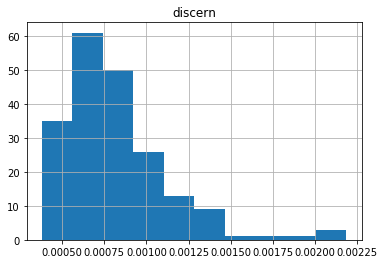

In [18]:
monds[monds["k"]==2].hist("discern")
monds.hist("discern")
